In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib widget

In [ ]:
""" 

Experiments On Padded Dataset: 
    
    NAME: diva_res_1
    SPACE: Constant beta_mach = 100 , Vary beta_stoch (1e-3, 1.0), Vary latent dims (5, 50)
    NOTES: 
        Of course latent dim > 25 is over fitting, then casually failing 
        Beta_Stoch > 0.1 has troubles. This may be due to beta_mach being around 100
        KLD_STOCH is close to 0 for beta_stoch > 0.01, i.e., stochastic dimension most likely ignored 
        Machine param reconstruction looks generally good, except for beta_stoch > 0.5. 
            
    NAME: diva_res_2
    SPACE: Constant beta_mach = 250, Vary beta_stoch (1e-3, 1.0), Vary latent dims(5, 15)    
    NOTES: 
        Same as above. 
        Plot looks like above plot, just shifted by 0.25 beta_stoch upwards...
        Both above plot and this one are constantly failing at dim=11 and periodically at 14... 
        STOCH dim ignored for beta_stoch > 0.01. Also STOCH values are considerable smaller than for beta_mach = 100. 
        This is expected, as the machine is  loading more information into beta_mach
        
    NAME: diva_res_3 
    SPACE: Constant beta_mach = 500, Vary beta_stoch (1e-3, 1.0), Vary latent dims (5, 15)
    NOTES: 
        
    
    
    TBD: 
        BETA MACH 
        ALPHA STOCH 
        ALPHA MACH 
        SUPERVISED vs UNSUPERVISED
        
    INPROG: 
        
        
        
        
        
"""

In [17]:
diva_res_1 = pd.read_csv('DIVA_SEARCH_STOCH_W_MACH_100_.csv')

In [5]:
loss_cols = ['loss', 'loss_mp', 'KLD_mach', 'KLD_stoch']
config_cols = ['config.mach_latent_dim', 'config.beta_stoch', 'config.beta_mach', 'config.alpha_prof', 'config.alpha_mach', 'config.loss_type']

combined_all = diva_res_1# pd.concat([diva_res_1,diva_res_2, diva_res_4]) 
# diva_res_1 = pd.concat([diva_res_1, diva_res_1ex])
# diva_res_2 = pd.concat([diva_res_2, diva_res_2ex])
# diva_res_3 = pd.concat([diva_res_3, diva_res_3ex])
# combined_all = combined_all[combined_all['loss'] < 1]

In [19]:
# diva_res_2ex[loss_cols + config_cols].sort_values(['loss', 'loss_mp'], ascending=[True, True]).head(20)
diva_res_1 = diva_res_1[(diva_res_1['loss'] < 1.0) & (diva_res_1['KLD_mach'] != np.inf)]

print(diva_res_1.isin([np.inf]).sum())
# diva_res_3.isna().any()

trial_id                    0
loss                        0
KLD_mach                    0
KLD_stoch                   0
loss_mp                     0
time_this_iter_s            0
done                        0
timesteps_total             0
episodes_total              0
training_iteration          0
experiment_id               0
date                        0
timestamp                   0
time_total_s                0
pid                         0
hostname                    0
node_ip                     0
time_since_restore          0
timesteps_since_restore     0
iterations_since_restore    0
experiment_tag              0
config.LR                   0
config.mach_latent_dim      0
config.beta_stoch           0
config.beta_mach            0
config.alpha_prof           0
config.alpha_mach           0
dtype: int64


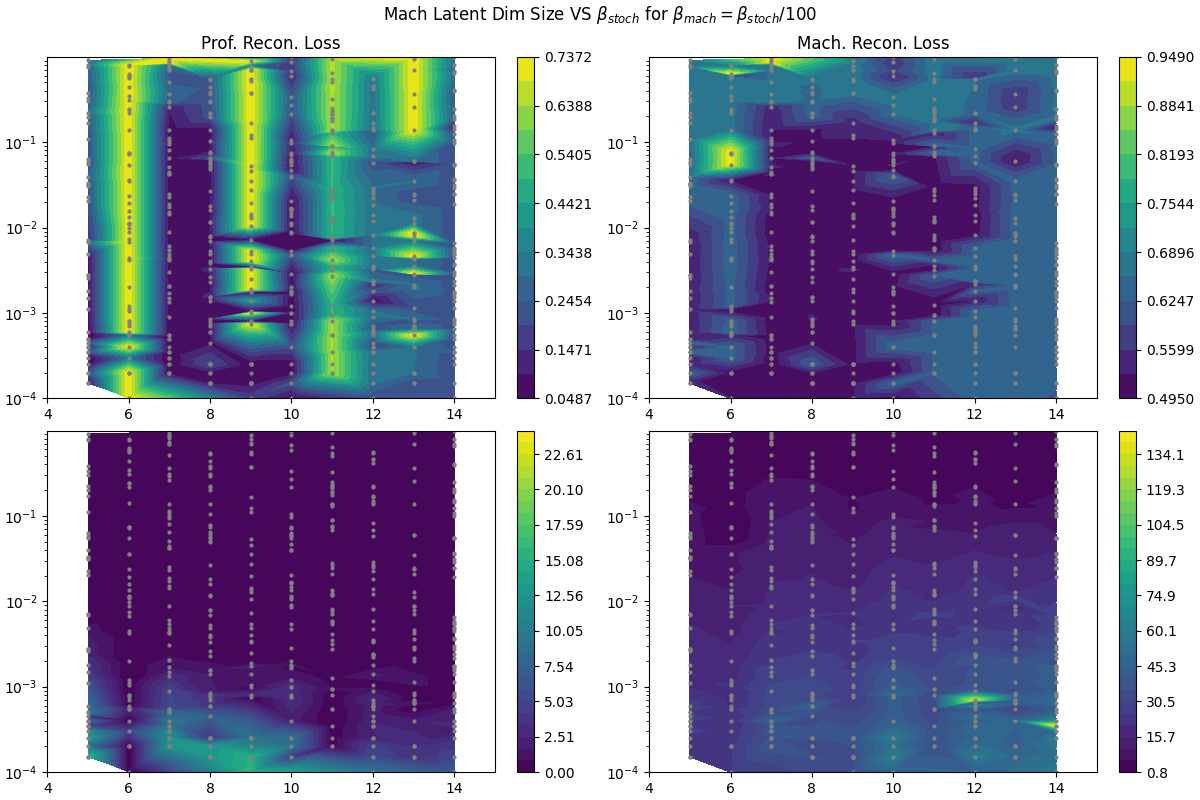

In [22]:
plt.close()

levels_loss = np.linspace(min(diva_res_1['loss']), max(diva_res_1['loss']), 15)
levels_loss_mp = np.linspace(min(diva_res_1['loss_mp']), max(diva_res_1['loss_mp']), 15)
levels_KLDSTOCH = np.linspace(min(diva_res_1['KLD_stoch']), max(diva_res_1['KLD_stoch']), 30)
levels_KLDMACH = np.linspace(min(diva_res_1['KLD_mach']), max(diva_res_1['KLD_mach']), 30)

fig, ax = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
ax = ax.ravel()
ax1 = ax[0].tricontourf(diva_res_1['config.mach_latent_dim'], diva_res_1['config.beta_stoch'], diva_res_1['loss'], levels=levels_loss)
ax2 = ax[1].tricontourf(diva_res_1['config.mach_latent_dim'], diva_res_1['config.beta_stoch'], diva_res_1['loss_mp'], levels=levels_loss_mp)
ax3 = ax[2].tricontourf(diva_res_1['config.mach_latent_dim'], diva_res_1['config.beta_stoch'], diva_res_1['KLD_stoch'], levels=levels_KLDSTOCH)
ax4 = ax[3].tricontourf(diva_res_1['config.mach_latent_dim'], diva_res_1['config.beta_stoch'], diva_res_1['KLD_mach'], levels=levels_KLDMACH)

for axs in ax: 
    axs.set_xlim(4, 15)
    axs.set_yscale('log')
    axs.plot(diva_res_1['config.mach_latent_dim'], diva_res_1['config.beta_stoch'], 'o', c='grey', markersize=2)

ax[0].set_title('Prof. Recon. Loss')
ax[1].set_title('Mach. Recon. Loss')

fig.colorbar(ax3, ax=ax[2])
fig.colorbar(ax4, ax=ax[3])
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
fig.suptitle(r'Mach Latent Dim Size VS $\beta_{stoch}$ for $\beta_{mach} = \beta_{stoch} / 100$')

plt.show()

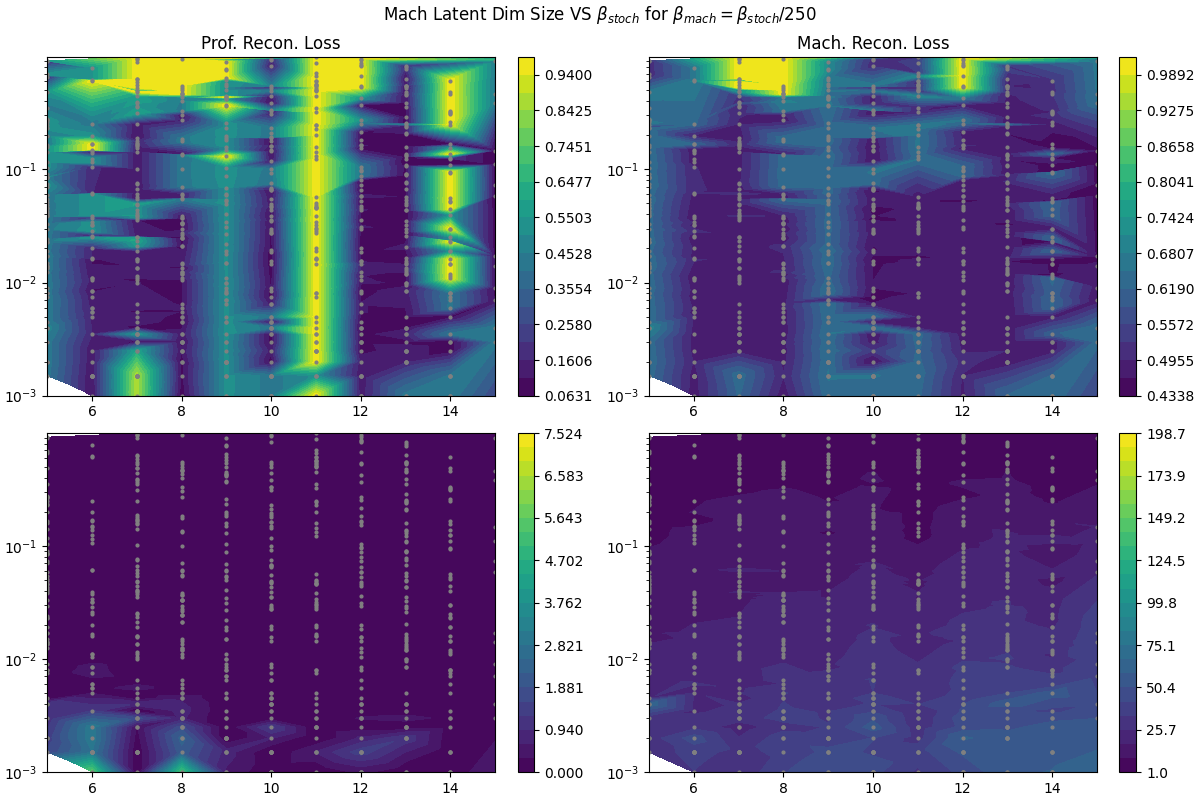

In [170]:
plt.close()

levels_loss = np.linspace(min(diva_res_2['loss']), max(diva_res_2['loss']), 20)
levels_loss_mp = np.linspace(min(diva_res_2['loss_mp']), max(diva_res_2['loss_mp']), 20)
levels_KLDSTOCH = np.linspace(min(diva_res_2['KLD_stoch']), max(diva_res_2['KLD_stoch']), 25)
levels_KLDMACH = np.linspace(min(diva_res_2['KLD_mach']), max(diva_res_2['KLD_mach']), 25)

fig, ax = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

ax = ax.ravel()
ax1 = ax[0].tricontourf(diva_res_2['config.mach_latent_dim'], diva_res_2['config.beta_stoch'], diva_res_2['loss'], levels=levels_loss)
ax2 = ax[1].tricontourf(diva_res_2['config.mach_latent_dim'], diva_res_2['config.beta_stoch'], diva_res_2['loss_mp'], levels=levels_loss_mp)
ax3 = ax[2].tricontourf(diva_res_2['config.mach_latent_dim'], diva_res_2['config.beta_stoch'], diva_res_2['KLD_stoch'], levels=levels_KLDSTOCH)
ax4 = ax[3].tricontourf(diva_res_2['config.mach_latent_dim'], diva_res_2['config.beta_stoch'], diva_res_2['KLD_mach'], levels=levels_KLDMACH)

for axs in ax: 
    axs.set_xlim(5, 15)
    axs.set_yscale('log')
    axs.plot(diva_res_2['config.mach_latent_dim'], diva_res_2['config.beta_stoch'], 'o', c='grey', markersize=2)

ax[0].set_title('Prof. Recon. Loss')
ax[1].set_title('Mach. Recon. Loss')


fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
fig.colorbar(ax3, ax=ax[2])
fig.colorbar(ax4, ax=ax[3])
fig.suptitle(r'Mach Latent Dim Size VS $\beta_{stoch}$ for $\beta_{mach} = \beta_{stoch} / 250$')


plt.show()

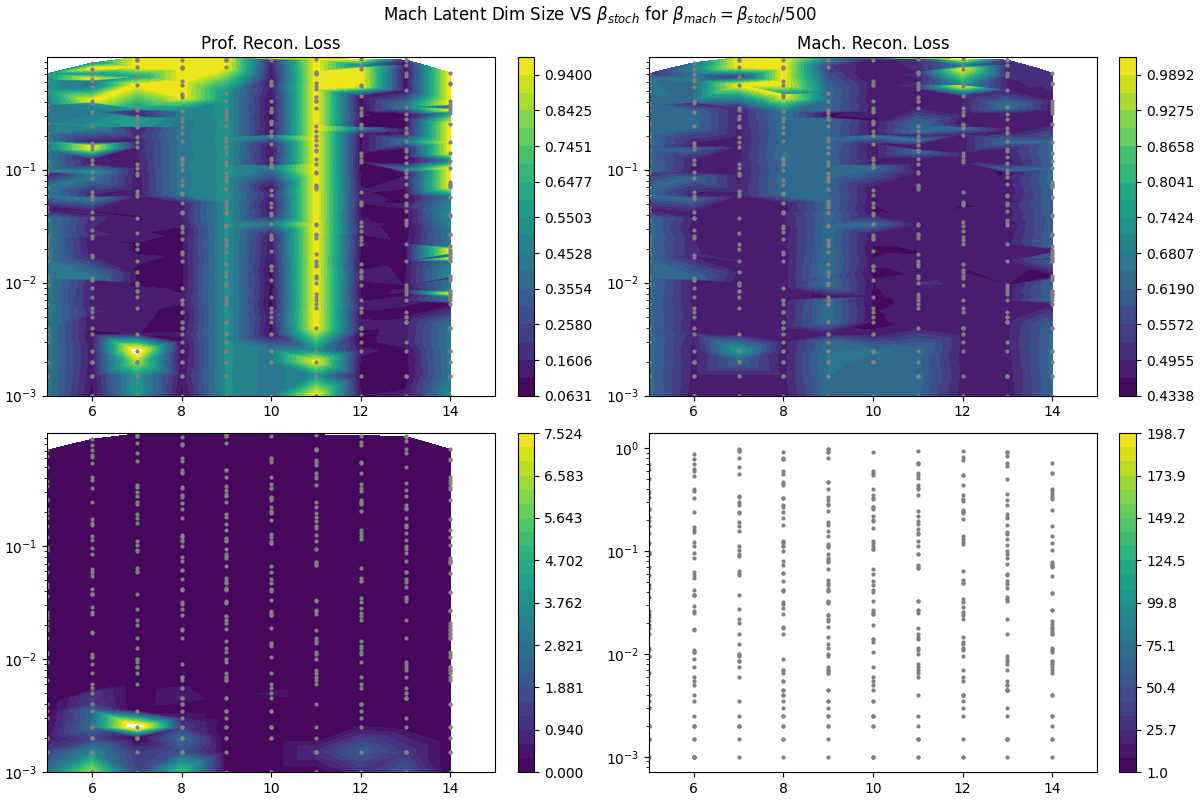

In [174]:
plt.close()
"""
levels_loss = np.linspace(min(diva_res_2['loss']), max(diva_res_2['loss']), 8)
levels_loss_mp = np.linspace(min(diva_res_2['loss_mp']), max(diva_res_2['loss_mp']), 8)
levels_KLDSTOCH = np.linspace(min(diva_res_2['KLD_stoch']), max(diva_res_2['KLD_stoch']),8)


"""
# levels_KLDMACH = np.linspace(min(diva_res_3['KLD_mach']), max(diva_res_3['KLD_mach']), 2)
fig, ax = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

ax = ax.ravel()
ax1 = ax[0].tricontourf(diva_res_3['config.mach_latent_dim'], diva_res_3['config.beta_stoch'], diva_res_3['loss'], levels=levels_loss)
ax2 = ax[1].tricontourf(diva_res_3['config.mach_latent_dim'], diva_res_3['config.beta_stoch'], diva_res_3['loss_mp'], levels=levels_loss_mp)
ax3 = ax[2].tricontourf(diva_res_3['config.mach_latent_dim'], diva_res_3['config.beta_stoch'], diva_res_3['KLD_stoch'], levels=levels_KLDSTOCH)
# ax4 = ax[3].tricontourf(diva_res_3['config.mach_latent_dim'], diva_res_3['config.beta_stoch'], diva_res_3['KLD_mach'], levels=levels_KLDMACH)

for axs in ax: 
    axs.set_xlim(5, 15)
    axs.set_yscale('log')
    axs.plot(diva_res_3['config.mach_latent_dim'], diva_res_3['config.beta_stoch'], 'o', c='grey', markersize=2)

ax[0].set_title('Prof. Recon. Loss')
ax[1].set_title('Mach. Recon. Loss')


fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
fig.colorbar(ax3, ax=ax[2])
fig.colorbar(ax4, ax=ax[3])
fig.suptitle(r'Mach Latent Dim Size VS $\beta_{stoch}$ for $\beta_{mach} = \beta_{stoch} / 500$')


plt.show()